In [22]:
'''
Ishank Jain
ID: 20757588
libraries
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import scipy as sp
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer
import sklearn 

In [23]:
df = pd.read_csv('dataB.csv')
feature = list(df)
df.head(5)

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,1,4,4,3,0,0,4,2,1,4,...,1,3,0,4,2,1,1,4,5,0
1,2,5,1,4,3,1,3,5,1,4,...,1,1,3,3,1,3,3,5,4,0
2,3,1,3,0,3,1,1,0,1,0,...,3,0,2,4,2,2,1,2,4,0
3,4,5,3,2,3,5,2,2,0,4,...,5,4,5,1,4,4,2,4,4,0
4,5,3,5,3,3,0,4,1,1,4,...,1,3,3,3,1,2,4,1,1,0


In [26]:
df=df.set_index('Unnamed: 0')
df.head(5)

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,4,4,3,0,0,4,2,1,4,1,...,1,3,0,4,2,1,1,4,5,0
2,5,1,4,3,1,3,5,1,4,4,...,1,1,3,3,1,3,3,5,4,0
3,1,3,0,3,1,1,0,1,0,2,...,3,0,2,4,2,2,1,2,4,0
4,5,3,2,3,5,2,2,0,4,5,...,5,4,5,1,4,4,2,4,4,0
5,3,5,3,3,0,4,1,1,4,3,...,1,3,3,3,1,2,4,1,1,0


In [27]:
from sklearn.manifold import (LocallyLinearEmbedding,Isomap)
embedding = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=5, n_components = 4)

In [28]:
embedding

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=4,
            n_jobs=None, n_neighbors=5, neighbors_algorithm='auto',
            random_state=None, reg=0.001, tol=1e-06)

In [29]:
transformed = embedding.fit_transform(df.loc[df['gnd'] == 3])

In [30]:
transformed.shape

(398, 4)

In [31]:
transformed

array([[-0.10663299, -0.00038219, -0.0067385 ,  0.00806583],
       [ 0.03971506, -0.06558214,  0.02095862,  0.07796953],
       [ 0.03216115,  0.10533253, -0.12144148,  0.03300217],
       ...,
       [ 0.03637505, -0.04301471,  0.031328  ,  0.0628715 ],
       [ 0.0242156 , -0.00838057,  0.01964647,  0.01219441],
       [ 0.03779537, -0.02933665, -0.00955659,  0.013431  ]])

In [32]:
new = pd.DataFrame(transformed)
new.head(5)

,0,1,2,3
0,-0.106633,-0.000382,-0.006738,0.008066
1,0.039715,-0.065582,0.020959,0.077970
2,0.032161,0.105333,-0.121441,0.033002
3,-0.039989,0.023886,-0.025919,0.007506
4,0.024636,0.037660,-0.036262,-0.002491


In [33]:
new = new.drop([2,3], axis=1)

In [50]:
new.head(5)

,0,1
0,-0.106633,-0.000382
1,0.039715,-0.065582
2,0.032161,0.105333
3,-0.039989,0.023886
4,0.024636,0.037660


In [55]:
y=[3]*398

In [65]:
from matplotlib import offsetbox
from sklearn import datasets

In [83]:
# Scale and visualize the embedding vectors

digits = datasets.load_digits(n_class=5)

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})


    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

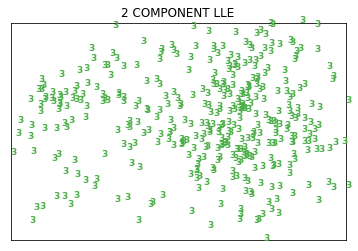

In [84]:
plot_embedding(new.values, '2 COMPONENT LLE')

In [85]:
embedding = sklearn.manifold.Isomap(n_neighbors=5, n_components = 4)
transformed = embedding.fit_transform(df.loc[df['gnd'] == 3])

In [86]:
new = pd.DataFrame(transformed)
new.head(5)

,0,1,2,3
0,4374.088140,1846.119626,-2859.114285,255.042563
1,-139.012696,-627.652030,1917.862343,-1313.950149
2,-2386.818004,505.515582,-3540.244157,-474.972488
3,2707.756346,1103.644366,-3897.302167,-188.354470
4,-2914.155127,742.414660,-1522.145555,3931.599361


In [87]:
new = new.drop([2,3], axis=1)
new.head(5)

,0,1
0,4374.088140,1846.119626
1,-139.012696,-627.652030
2,-2386.818004,505.515582
3,2707.756346,1103.644366
4,-2914.155127,742.414660


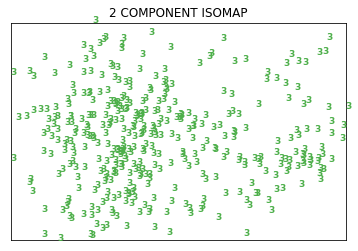

In [88]:
plot_embedding(new.values, '2 COMPONENT ISOMAP')